In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from nachbarstrom import LocalImgDataProvider
from tf_unet import unet
from tf_unet import util

In [3]:
basedir = "/home/tomas_ruiz_te_gmail_com/labelbox-download/"
generator = LocalImgDataProvider(basedir=basedir)

In [4]:
def x_norming(gen):
    def wrapped_gen(num_samples):
        X, y = gen(num_samples)
        normed_X = (X - X.mean()) / X.std()
        return normed_X, y
    return wrapped_gen

In [5]:
generator = x_norming(generator)
generator.n_class = 2
generator.channels = 3

In [6]:
x_test, y_test = generator(1)

In [7]:
y_test[:,:,].shape

(1, 640, 640, 2)

2018-09-12 14:24:59,157 Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5,1,'Not Suitable Area')

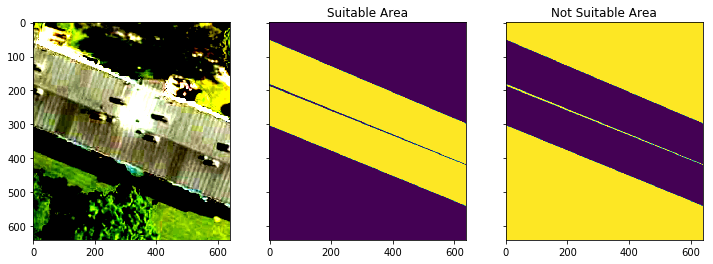

In [9]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,4))
ax[0].imshow(x_test[0,...], aspect="auto")
ax[1].imshow(y_test[0,...,0], aspect="auto"); ax[1].set_title("Suitable Area")
ax[2].imshow(y_test[0,...,1], aspect="auto"); ax[2].set_title("Not Suitable Area")

In [12]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=32, cost="dice_coefficient")

2018-09-12 14:25:22,368 Layers 3, features 32, filter size 3x3, pool size: 2x2


In [13]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [14]:
results_dir = "./tf_single_img_results"
path = trainer.train(generator, results_dir, training_iters=10, epochs=40, display_step=2, restore=False)

2018-09-12 14:25:25,776 Removing '/home/tomas_ruiz_te_gmail_com/python-nachbarstrom-dl-unet/demo/prediction'
2018-09-12 14:25:25,780 Removing '/home/tomas_ruiz_te_gmail_com/python-nachbarstrom-dl-unet/demo/tf_single_img_results'
2018-09-12 14:25:25,797 Allocating '/home/tomas_ruiz_te_gmail_com/python-nachbarstrom-dl-unet/demo/prediction'
2018-09-12 14:25:25,798 Allocating '/home/tomas_ruiz_te_gmail_com/python-nachbarstrom-dl-unet/demo/tf_single_img_results'
2018-09-12 14:25:35,109 Verification error= 58.9%, loss= -0.4980
2018-09-12 14:25:35,953 Start optimization
2018-09-12 14:25:43,613 Iter 0, Minibatch Loss= -0.5023, Training Accuracy= 0.5987, Minibatch error= 40.1%
2018-09-12 14:25:46,102 Iter 2, Minibatch Loss= -0.5134, Training Accuracy= 0.5319, Minibatch error= 46.8%
2018-09-12 14:25:48,580 Iter 4, Minibatch Loss= -0.5563, Training Accuracy= 0.7151, Minibatch error= 28.5%
2018-09-12 14:25:51,134 Iter 6, Minibatch Loss= -0.5099, Training Accuracy= 0.4128, Minibatch error= 58.7%
20

2018-09-12 14:28:24,211 Iter 114, Minibatch Loss= -0.6450, Training Accuracy= 0.5268, Minibatch error= 47.3%
2018-09-12 14:28:26,714 Iter 116, Minibatch Loss= -0.8303, Training Accuracy= 0.8798, Minibatch error= 12.0%
2018-09-12 14:28:29,168 Iter 118, Minibatch Loss= -0.4697, Training Accuracy= 0.4811, Minibatch error= 51.9%
2018-09-12 14:28:29,732 Epoch 11, Average loss: -0.6667, learning rate: 0.1138
2018-09-12 14:28:30,547 Verification error= 30.8%, loss= -0.7236
2018-09-12 14:28:33,411 Iter 120, Minibatch Loss= -0.7242, Training Accuracy= 0.6317, Minibatch error= 36.8%
2018-09-12 14:28:35,915 Iter 122, Minibatch Loss= -0.7513, Training Accuracy= 0.7787, Minibatch error= 22.1%
2018-09-12 14:28:38,458 Iter 124, Minibatch Loss= -0.8310, Training Accuracy= 0.7620, Minibatch error= 23.8%
2018-09-12 14:28:41,047 Iter 126, Minibatch Loss= -0.8651, Training Accuracy= 0.8703, Minibatch error= 13.0%
2018-09-12 14:28:43,514 Iter 128, Minibatch Loss= -0.5907, Training Accuracy= 0.4738, Minibat

2018-09-12 14:31:14,967 Iter 234, Minibatch Loss= -1.0319, Training Accuracy= 0.9717, Minibatch error= 2.8%
2018-09-12 14:31:17,430 Iter 236, Minibatch Loss= -0.9227, Training Accuracy= 0.9496, Minibatch error= 5.0%
2018-09-12 14:31:19,890 Iter 238, Minibatch Loss= -0.7317, Training Accuracy= 0.7459, Minibatch error= 25.4%
2018-09-12 14:31:20,428 Epoch 23, Average loss: -0.8364, learning rate: 0.0615
2018-09-12 14:31:21,247 Verification error= 9.3%, loss= -0.9014
2018-09-12 14:31:24,143 Iter 240, Minibatch Loss= -0.9057, Training Accuracy= 0.8770, Minibatch error= 12.3%
2018-09-12 14:31:26,849 Iter 242, Minibatch Loss= -0.8388, Training Accuracy= 0.8730, Minibatch error= 12.7%
2018-09-12 14:31:29,357 Iter 244, Minibatch Loss= -0.9097, Training Accuracy= 0.9562, Minibatch error= 4.4%
2018-09-12 14:31:31,907 Iter 246, Minibatch Loss= -0.7039, Training Accuracy= 0.7802, Minibatch error= 22.0%
2018-09-12 14:31:34,329 Iter 248, Minibatch Loss= -0.8471, Training Accuracy= 0.8950, Minibatch e

2018-09-12 14:34:08,677 Iter 354, Minibatch Loss= -0.9205, Training Accuracy= 0.9055, Minibatch error= 9.5%
2018-09-12 14:34:11,166 Iter 356, Minibatch Loss= -1.0129, Training Accuracy= 0.9439, Minibatch error= 5.6%
2018-09-12 14:34:13,562 Iter 358, Minibatch Loss= -0.8032, Training Accuracy= 0.8335, Minibatch error= 16.7%
2018-09-12 14:34:14,117 Epoch 35, Average loss: -0.8114, learning rate: 0.0332
2018-09-12 14:34:14,931 Verification error= 11.1%, loss= -0.8968
2018-09-12 14:34:17,969 Iter 360, Minibatch Loss= -0.8486, Training Accuracy= 0.8856, Minibatch error= 11.4%
2018-09-12 14:34:20,448 Iter 362, Minibatch Loss= -0.8068, Training Accuracy= 0.8550, Minibatch error= 14.5%
2018-09-12 14:34:22,910 Iter 364, Minibatch Loss= -0.8645, Training Accuracy= 0.8532, Minibatch error= 14.7%
2018-09-12 14:34:25,402 Iter 366, Minibatch Loss= -0.8634, Training Accuracy= 0.8937, Minibatch error= 10.6%
2018-09-12 14:34:28,304 Iter 368, Minibatch Loss= -0.8266, Training Accuracy= 0.8189, Minibatch

In [29]:
x_test, y_test = generator(1)
model_fname = os.path.join(results_dir, "model.ckpt")
prediction = net.predict(model_fname, x_test)

INFO:tensorflow:Restoring parameters from ./tf_single_img_results/model.ckpt


2018-09-12 14:37:07,613 Restoring parameters from ./tf_single_img_results/model.ckpt
2018-09-12 14:37:07,743 Model restored from file: ./tf_single_img_results/model.ckpt


In [30]:
mask_1 = prediction[0,...,0]
mask_2 = prediction[0,...,1]
print(mask_1.min(), mask_1.max())
print(mask_2.min(), mask_2.max())

2.8436753e-15 0.99987507
0.00012490418 1.0


2018-09-12 14:37:08,145 Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


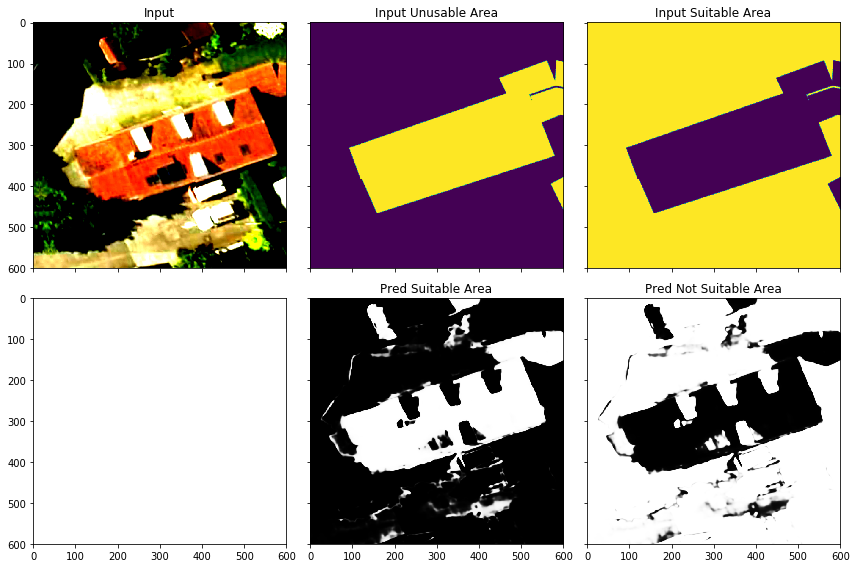

In [31]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
ax[0, 0].imshow(x_test[0,...], aspect="auto"); ax[0, 0].set_title("Input")
ax[0, 1].imshow(y_test[0,...,0], aspect="auto"); ax[0, 1].set_title("Input Unusable Area")
ax[0, 2].imshow(y_test[0,...,1], aspect="auto"); ax[0, 2].set_title("Input Suitable Area")

ax[1, 1].imshow(mask_1, aspect="auto", cmap="gray"); ax[1, 1].set_title("Pred Suitable Area")
ax[1, 2].imshow(mask_2, aspect="auto", cmap="gray"); ax[1, 2].set_title("Pred Not Suitable Area")

fig.tight_layout()
# fig.savefig("nachbarstrom-evaluation.png")